In [1]:
# !pip install pystan==2.19.1.1
# !pip install prophet
# !pip install plotly

In [8]:
# Python
import pandas as pd
from prophet import Prophet
import os
os.listdir()
path = open('document.txt', 'r').read().strip()

In [9]:
files = os.listdir(path)
files.sort()
print(files)

['2010_street.feather', '2011_street.feather', '2012_street.feather', '2013_street.feather', '2014_street.feather', '2015_street.feather', '2016_street.feather', '2017_street.feather', '2018_street.feather', '2019_street.feather', '2020_street.feather', '2021_street.feather']


## Notes Police forces
apparently 'Greater Manchester Police' force was removed from 2020 to 2021 <br><br>
'Police Service of Northern Ireland' is included from 2011 onwards

## idea
instead of only count of crimes we can implement a weighted count where more severe crimes have more effect on the total count

In [10]:

def Count_by_district(district):
    for i in files[6:9]:
        if not 'df_data' in globals():
            df_data = pd.read_feather(f"{path}/{i}")
            df_data = df_data[['Month', 'Falls within']]
            df_data = df_data[df_data['Falls within']==district]
        else:
            df_new = pd.read_feather(f"{path}/{i}")
            df_new = df_new[['Month', 'Falls within']]
            df_new = df_new[df_new['Falls within']==district]
            df_data = pd.concat([df_data, df_new], ignore_index=True)

    return df_data

Count_by_district(district='South Wales Police')

UnboundLocalError: local variable 'df_data' referenced before assignment

In [4]:
print(df_data['Falls within'].value_counts())
df_data['Falls within'].value_counts().mean()

Metropolitan Police Service           3090529
Greater Manchester Police             1167170
West Yorkshire Police                  967923
West Midlands Police                   841745
Northumbria Police                     606650
Kent Police                            598631
South Yorkshire Police                 589561
Lancashire Constabulary                586327
Hampshire Constabulary                 565077
Essex Police                           553039
Thames Valley Police                   552292
Avon and Somerset Constabulary         531738
Merseyside Police                      498663
Police Service of Northern Ireland     467425
Sussex Police                          437244
South Wales Police                     417864
Devon & Cornwall Police                417766
Nottinghamshire Police                 380073
West Mercia Police                     378014
Staffordshire Police                   355288
Hertfordshire Constabulary             333045
Humberside Police                 

428324.5777777778

In [7]:
district = df_data[df_data['Falls within']=='South Wales Police']
del df_data
predict = {}

district = district.sort_values(by=['Month'])
months = district['Month'].unique()
for i in months:
    predict[i] = len(district[district['Month']==i])
predict = pd.DataFrame({'ds': list(predict.keys()), 'y': list(predict.values())})
predict['ds'] = pd.to_datetime(predict['ds'])

NameError: name 'df_data' is not defined

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -47.5123
Iteration  1. Log joint probability =    16.9093. Improved by 64.4216.
Iteration  2. Log joint probability =    59.6081. Improved by 42.6988.
Iteration  3. Log joint probability =     82.196. Improved by 22.5879.
Iteration  4. Log joint probability =    99.0683. Improved by 16.8723.
Iteration  5. Log joint probability =    109.183. Improved by 10.1149.
Iteration  6. Log joint probability =    110.728. Improved by 1.54513.
Iteration  7. Log joint probability =    110.753. Improved by 0.0243695.
Iteration  8. Log joint probability =    110.766. Improved by 0.0127846.
Iteration  9. Log joint probability =    110.797. Improved by 0.0316241.
Iteration 10. Log joint probability =    110.832. Improved by 0.0346036.
Iteration 11. Log joint probability =    110.842. Improved by 0.0104054.
Iteration 12. Log joint probability =    110.898. Improved by 0.0558343.
Iteration 13. Log joint probability =    110.909. Improved by 0.0113252.
Iteration 14. Log joi

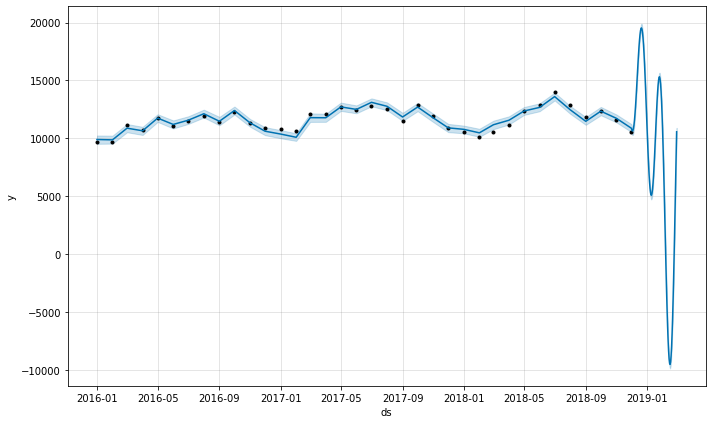

In [8]:
m = Prophet(seasonality_mode='multiplicative').fit(predict)
future = m.make_future_dataframe(periods=90)
fcst = m.predict(future)
fig = m.plot(fcst)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Gradient evaluation took 5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 4.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 4.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)

Gradient evaluation took 5.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 210 / 300 [ 70%]  (Sampling)
Iteration: 150 / 300 [ 50%]  (Warmup)


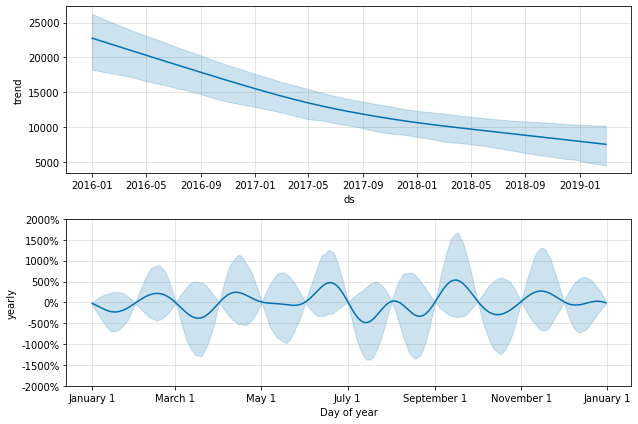

In [13]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(predict)
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3659,2026-11-27,28754.505085,27986.772338,29561.662701
3660,2026-11-28,28759.126610,28029.593583,29590.938167
3661,2026-11-29,28763.748134,28047.400132,29499.106403
3662,2026-11-30,28768.369658,27951.327102,29542.228971
3663,2026-12-01,28772.991183,28011.821883,29544.202383


In [52]:
# df_predict = df_data[~df_data.isna()]
# df_predict

In [53]:
# df_data.loc[[129657]]

In [54]:
# df_predict = df_data[['Month', 'Longitude', 'Latitude']].reset_index()
# index = df_predict.pop('index')
# df_predict.insert(1, 'index', index)


# df_predict.columns = ['ds', 'y', 'add1', 'add2']

# df_predict
